# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and save it as raw data.
* Inspect the data and save it under outputs/datasets/collection

## Inputs

*   Kaggle JSON file - the authentication token.

## Outputs

* Generate Dataset: outputs/datasets/collection/TelcoCustomerChurn.csv

## Additional Comments


* In the workplace, **projects are not done using Kaggle data**, but instead, the data comes from multiple data sources that may be hosted internally (like in a data warehouse) or outside your company. For this project learning context, we are fetching the data from Kaggle.

* Another aspect is that in the workplace, the **data has never been pushed to a public repository** due to security reasons. Just for this project learning context, we are hosting the data in a public repo.


---

# Install python packages in the notebooks

In [1]:
%pip install -r /workspace/pp5-house-price-prediction 2>/dev/null | grep -v 'Requirement already satisfied'
print('Requirements installed.')

Note: you may need to restart the kernel to use updated packages.
Requirements installed.


In [9]:


import os
import numpy
import zipfile
import shutil
import random
import joblib
import zipfile


# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
current_dir = os.getcwd()
print('Current folder: ' + current_dir)
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print('New folder: ' + current_dir)

Current folder: /workspace/pp5-house-price-prediction/jupyter_notebooks
New folder: /workspace/pp5-house-price-prediction


# Download dataset from kaggle
- Install Kaggle, configure the directory, and set permissions for the Kaggle authentication JSON.
- Download the Kaggle dataset.
- Unzip the file and delete the zip file and unlabeled images.

In [10]:
# Install Kaggle API
%pip install kaggle==1.5.12 2>/dev/null | grep -v 'Requirement already satisfied'
print('Requirements installed.')

# Set Kaggle config directory for authentication
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Make sure kaggle.json file has correct permissions (only if you're using Colab or Jupyter)
!chmod 600 kaggle.json
print('Directory configured and permissions set.')

# Download the dataset
!kaggle datasets download -d camnugent/california-housing-prices

# Extract the downloaded .zip file
import zipfile
DatasetFolder = os.getcwd()  # Set the directory where you want to store the dataset
print('Extracting files...')
with zipfile.ZipFile(DatasetFolder + '/california-housing-prices.zip', 'r') as zip_ref:
    zip_ref.extractall(DatasetFolder)

# Optionally, clean up the zip file after extraction
os.remove(DatasetFolder + '/california-housing-prices.zip')

print('Unused files deleted.')


Note: you may need to restart the kernel to use updated packages.
Requirements installed.
Directory configured and permissions set.
100%|████████████████████████████████████████| 400k/400k [00:00<00:00, 1.12MB/s]
100%|████████████████████████████████████████| 400k/400k [00:00<00:00, 1.11MB/s]
Extracting files...
Unused files deleted.


---

# Loading dataset & exploration

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the csv file in to the workspace


In [12]:
data = pd.read_csv("housing.csv")

Check the data for any errors

In [13]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Checking for non-null values

In [14]:
data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

remove all rows with missing values (NaN) from the DataFrame data. The inplace=True part means it modifies the original DataFrame directly without needing to create a new one.

In [15]:
data.dropna(inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


X = data.drop(["median_house_value"], axis=1) creates the feature set by removing the target column, and y = data["median_house_value"] defines the target variable for prediction.

In [17]:
from sklearn.model_selection import train_test_split
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

split the dataset into 80% for training and 20% for testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
train_data = X_train.join(y_train)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12208,-117.10,33.56,6.0,1868.0,289.0,750.0,247.0,4.3833,<1H OCEAN,307600.0
1693,-122.26,38.00,14.0,2338.0,391.0,1003.0,398.0,4.2269,NEAR BAY,170500.0
2879,-118.97,35.37,41.0,2396.0,602.0,1781.0,543.0,1.8819,INLAND,58000.0
6696,-118.10,34.14,45.0,3066.0,659.0,1287.0,625.0,3.5804,<1H OCEAN,324400.0
11110,-117.89,33.85,13.0,1583.0,474.0,1672.0,432.0,3.2303,<1H OCEAN,201300.0
...,...,...,...,...,...,...,...,...,...,...
1849,-122.28,37.91,48.0,2083.0,298.0,685.0,286.0,7.3089,NEAR BAY,331200.0
5264,-118.57,34.09,14.0,7970.0,1142.0,2926.0,1096.0,11.2866,<1H OCEAN,500001.0
2704,-115.57,32.83,31.0,1494.0,289.0,959.0,284.0,3.5282,INLAND,67500.0
567,-122.24,37.76,52.0,2567.0,436.0,1119.0,415.0,4.6094,NEAR BAY,229300.0


create histograms for each numeric column in train_data, with a larger plot size for better visibility.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

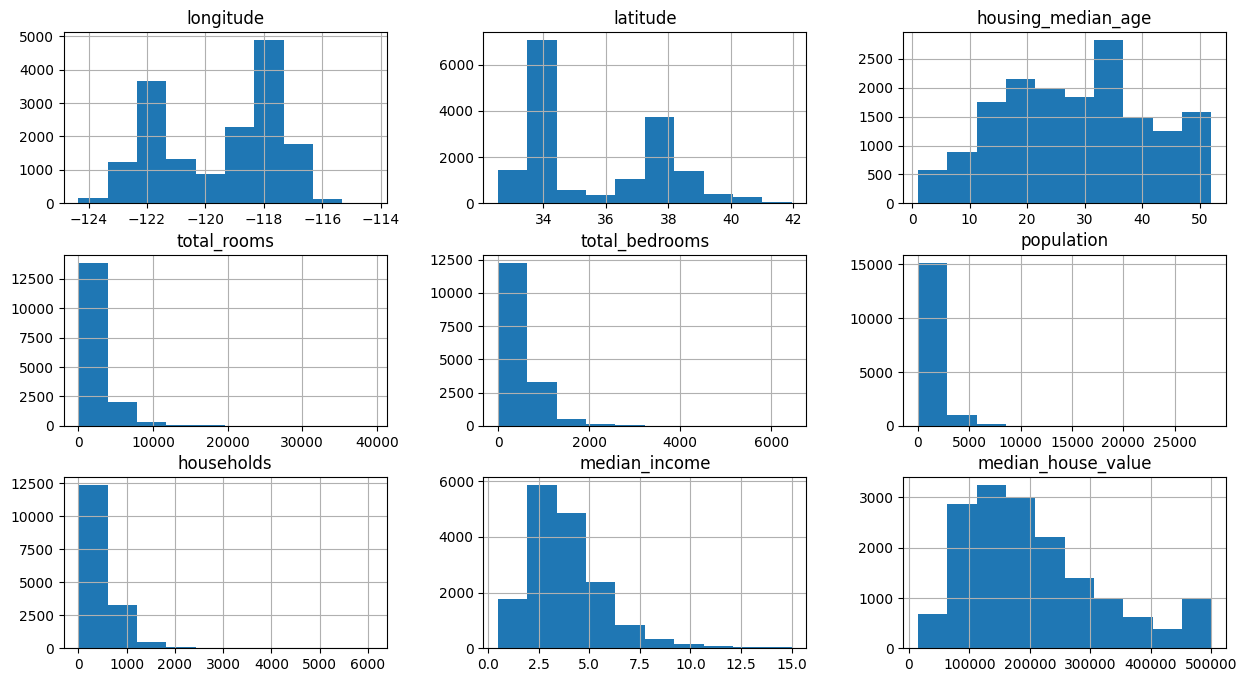

In [21]:
train_data.hist(figsize=(15,8))

This generates a heatmap of the correlation matrix for numeric columns in train_data, with annotations showing the correlation values, using a yellow-green-blue color palette for visualization.

<AxesSubplot:>

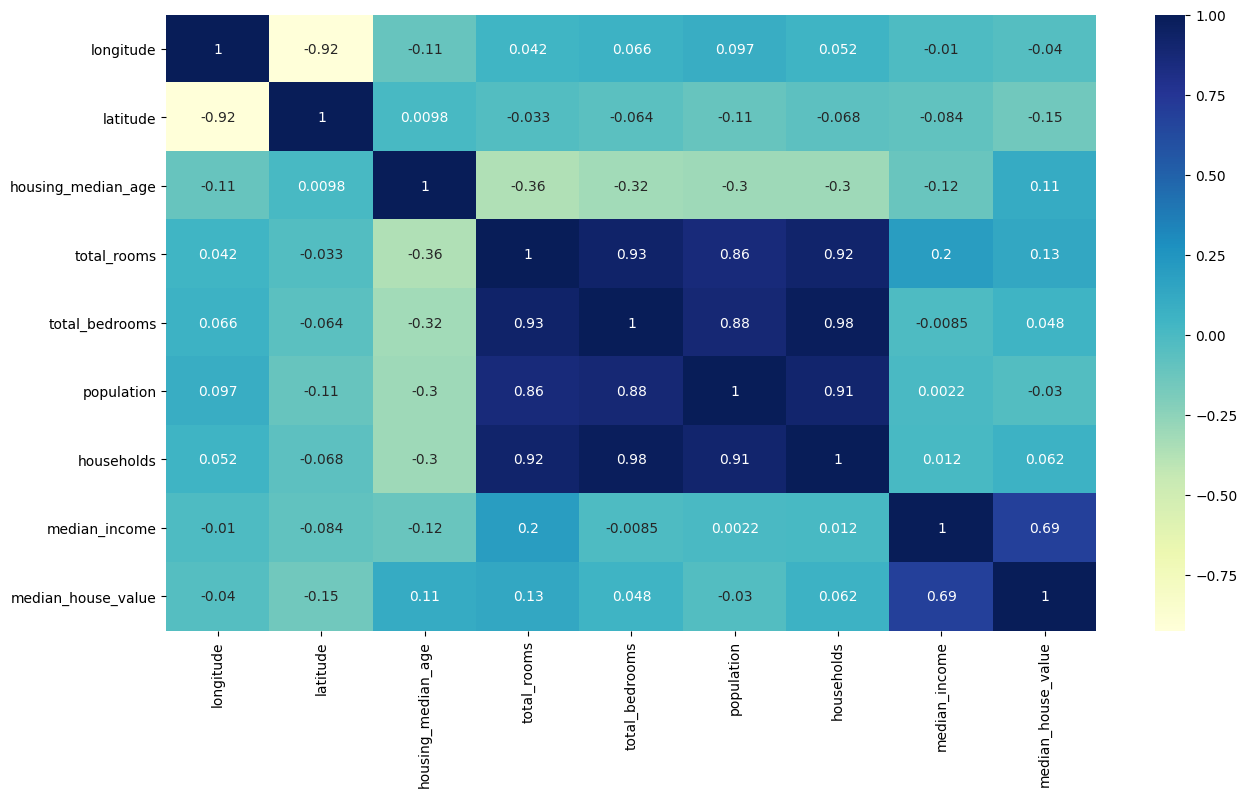

In [25]:
plt.figure(figsize=(15,8))
numeric_data = train_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")